**Scikit-learn**

**108. Typical scikit-learn Workflow**

In [114]:
import numpy as np
import pandas as pd

In [115]:
#Step 1. Get Data Ready
heart_disease=pd.read_csv("Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [116]:
#x is features matrix
x=heart_disease.drop("target",axis=1)
#y is labels
y=heart_disease["target"]

In [117]:
#Step.2 Choose right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
#To keep default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [118]:
#Step3. Fit model to traning data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [119]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [120]:
#Make a prediction
y_preds=clf.predict(x_test)

In [121]:
y_preds

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [122]:
y_test

214    0
235    0
18     1
191    0
203    0
      ..
75     1
53     1
145    1
159    1
65     1
Name: target, Length: 61, dtype: int64

In [123]:
#Step 4. Evaluate The model on training and testing data
clf.score(x_train,y_train)

1.0

In [124]:
clf.score(x_test,y_test)

0.8524590163934426

In [125]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.82      0.90      0.86        31

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [126]:
confusion_matrix(y_test,y_preds)

array([[24,  6],
       [ 3, 28]], dtype=int64)

In [127]:
accuracy_score(y_test,y_preds)

0.8524590163934426

In [128]:
#Step 5. Improve the model
#by Trying different amount of n_estimators
np.random.seed(1)
list=[]
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"model accuracy on test dataset is {clf.score(x_test,y_test)*100:.2f}%")
    list.append(clf.score(x_test,y_test)*100)
    print(" ")
print(list)   
print(max(list))

Trying model with 10 estimators...
model accuracy on test dataset is 80.33%
 
Trying model with 20 estimators...
model accuracy on test dataset is 83.61%
 
Trying model with 30 estimators...
model accuracy on test dataset is 86.89%
 
Trying model with 40 estimators...
model accuracy on test dataset is 85.25%
 
Trying model with 50 estimators...
model accuracy on test dataset is 85.25%
 
Trying model with 60 estimators...
model accuracy on test dataset is 88.52%
 
Trying model with 70 estimators...
model accuracy on test dataset is 83.61%
 
Trying model with 80 estimators...
model accuracy on test dataset is 86.89%
 
Trying model with 90 estimators...
model accuracy on test dataset is 85.25%
 
[80.32786885245902, 83.60655737704919, 86.88524590163934, 85.24590163934425, 85.24590163934425, 88.52459016393442, 83.60655737704919, 86.88524590163934, 85.24590163934425]
88.52459016393442


In [129]:
#Step 6. Save model and load 
import pickle
pickle.dump(clf,open("Random_Forest_model_1.pkl","wb"))

In [130]:
loaded_model=pickle.load(open("Random_Forest_model_1.pkl","rb"))
loaded_model.score(x_test,y_test)    # gives score of last model(which was in above loop)

0.8524590163934426

In [131]:
import sklearn
sklearn.show_versions()


System:
    python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
executable: D:\DataScienceUdemy\MachineLearning\env\python.exe
   machine: Windows-11-10.0.26100-SP0

Python dependencies:
      sklearn: 1.5.1
          pip: 24.2
   setuptools: 75.1.0
        numpy: 1.26.4
        scipy: 1.14.1
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.9.2
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
    num_threads: 2
         prefix: mkl_rt
       filepath: D:\DataScienceUdemy\MachineLearning\env\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel

       user_api: openmp
   internal_api: openmp
    num_threads: 4
         prefix: vcomp
       filepath: D:\DataScienceUdemy\MachineLearning\env\vcomp140.dll
        version: None

       user_api: openmp
   internal_api: openmp
    num_threads: 4
         prefix: libiomp
    

**112. Getting Your Data Ready:Convert Data To Numbers**

In [132]:
car_sales=pd.read_csv("Data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [133]:
x=car_sales.drop("Price",axis=1)
y=car_sales['Price']

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [135]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [136]:
#Converting to numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("One_Hot",one_hot,categorical_features)], remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [137]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [138]:
dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [139]:
np.random.seed(1)
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.31207113535105824

**114. Getting Your Data Ready: Handling Missing Values With Pandas**

In [140]:
car_sales_missing=pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

**Option 1. Handling Nan(No need in this version of Scikit-learn)**

In [141]:
car_sales_missing["Doors"].value_counts()

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [142]:
car_sales_missing["Make"].fillna("Missing",inplace=True)
car_sales_missing["Colour"].fillna("Missing",inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

C:\Users\vinayak\AppData\Local\Temp\ipykernel_2012\559354038.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("Missing",inplace=True)
C:\Users\vinayak\AppData\Local\Temp\ipykernel_2012\559354038.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [143]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [144]:
#Remove rows with missing price values as it is label and must have a value to train data
car_sales_missing.dropna(inplace=True)

In [145]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [146]:
len(car_sales_missing)

950

In [147]:
x=car_sales_missing.drop("Price", axis=1)
y=car_sales_missing["Price"]

In [148]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [149]:
pd.DataFrame(transformed_x)

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...
...,...
945,<Compressed Sparse Row sparse matrix of dtype ...
946,<Compressed Sparse Row sparse matrix of dtype ...
947,<Compressed Sparse Row sparse matrix of dtype ...
948,<Compressed Sparse Row sparse matrix of dtype ...


**115. Getting Your Data Ready: Handling Missing Values With Scikit-learn**

**Option 2: Fill missing values with Scikit-learn**

In [150]:
car_sales_missing=pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [151]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [152]:
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [153]:
x=car_sales_missing.drop(["Price"],axis=1)
y=car_sales_missing["Price"]

In [154]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

#Creating imputer that fills data
imputer=ColumnTransformer([("cat_imputer",cat_imputer,cat_features),("door_imputer",door_imputer,door_features),("num_imputer",num_imputer,num_features)])

filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [155]:
car_sales_filled_x=pd.DataFrame(filled_x,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled_x

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [156]:
car_sales_filled_x.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [157]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_filled_x)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [158]:
np.random.seed(1)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.25158720734485374

**118. Choosing right model for your Data (Regression)**

* Scikit-learn refers to ML models/algorithms as estimators.
* Classification problem-predicting a category(heart disease or not,only two values here)
    * Classification estimator called Classifier is used("clf" in short)
* Regression problem=predicting a number(selling price of a car)
* Refer: https://scikit-learn.org/1.3/tutorial/machine_learning_map/
* Housing Dataset: https://scikit-learn.org/1.3/datasets/real_world.html#california-housing-dataset

In [194]:
from sklearn.datasets import load_iris

In [195]:
data=load_iris()

In [196]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [197]:
housing=pd.read_csv("Data/cal_housing.data",header=None)
housing

,0,1,2,3,4,5,6,7,8
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [198]:
x=pd.read_csv("Data/cal_housing.domain",header=None)
x

,0
0,longitude: continuous.
1,latitude: continuous.
2,housingMedianAge: continuous.
3,totalRooms: continuous.
4,totalBedrooms: continuous.
5,population: continuous.
6,households: continuous.
7,medianIncome: continuous.
8,medianHouseValue: continuous.


In [199]:
housing_df=housing.set_axis(["longitude","latitude","housingMedianAge","totalRooms","totalBedrooms","population","households","medianIncome","medianHouseValue"],axis=1,)
housing_df

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [200]:
np.random.seed(1)
x=housing_df.drop("medianHouseValue",axis=1)
y=housing_df['medianHouseValue']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

* Ridge Model

In [201]:
#Using Ridge
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6283459798947879

* If Ridge doesn't work try ensemble model
* Ensemble methods combine predictions of sveral base estimators(models) for better results
* Refer:
    * Ensemble Methodes - https://scikit-learn.org/0.16/modules/ensemble.html
    * Random forest algorithm - https://williamkoehrsen.medium.com/random-forest-simple-explanation-377895a60d2d
    * RandomForestRegressor - https://scikit-learn.org/0.16/modules/generated/sklearn.ensemble.RandomForestRegressor.html

* RandomForestRegressor 

In [202]:
#Using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8181142169690621

* Coefficient of Determination(R^2): one of Regression Metrics
    * formula1=R^2 where R is Correlation Coefficient
    * formula2=1-(RSS(Residual Sum Of Squares)/TSS(Total Sum Of Squares))
    * Refer Example - https://www.cuemath.com/coefficient-of-determination-formula/

**122. Choosing the right model for your Data 3 (Classsification)**

* `SVC`, `NuSVC` and `LinearSVC` are classes capable of performing binary and multi-class classification on a dataset.
* Refer :
    * Map to choose model - https://scikit-learn.org/1.3/tutorial/machine_learning_map/
    * Support Vector Machine (SVM) - https://scikit-learn.org/1.3/modules/svm.html#classification
    * LinearSVC : https://scikit-learn.org/1.3/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

* Linear SVC

In [204]:
heart_disease=pd.read_csv("Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [207]:
np.random.seed(1)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [209]:
from sklearn.svm import LinearSVC
clf=LinearSVC()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7377049180327869

* RandomForestClassifier (Ensemble Method)

In [214]:
heart_disease=pd.read_csv("Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [221]:
np.random.seed(2)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [222]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8852459016393442

* If you have `Structured Data`, use `Ensemble Methods`
* If you have `Unstructured Data`, use `Deep Learning` or `Transfer Learning`

**123. Fitting a model to the Data** 
Already done, see above example

## 124. Making Predictions with our model

**2 ways:**
* `predict()`
* `predict_proba()`

* 1st way: `predict()`

In [231]:
clf.predict(x_test)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [232]:
#Comparing predictions to true labels (Already we have done it using clf.score() and also by accuracy_score (3 Ways))
y_preds=clf.predict(x_test)
np.mean(y_preds==y_test)

0.8852459016393442

In [233]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8852459016393442

In [234]:
clf.score(x_test,y_test)

0.8852459016393442

## 125. predict() vs predict_proba()

* 2nd way: `predict_proba()`
    * It returns probabilities of classification labels. The one with probability greater than 0.5 will be given as prdicted_value.
    * eg. here heart disease and no heart disease(2 classes of labels), 1st probability is of 0(not having heart disease) and 2nd is of 1(have heart disease)

In [240]:
clf.predict_proba(x_test[:5])

array([[0.17, 0.83],
       [0.49, 0.51],
       [0.29, 0.71],
       [0.11, 0.89],
       [0.73, 0.27]])

In [241]:
clf.predict(x_test[:5])

array([1, 1, 1, 1, 0], dtype=int64)

## 126. Making predictions with our Model (Regression)
* Using `predict()`

In [243]:
housing_df

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [270]:
np.random.seed(1)
x=housing_df.drop("medianHouseValue",axis=1)
y=housing_df["medianHouseValue"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8181142169690621

In [271]:
model.score(x_train,y_train)

0.9748752421323377

In [272]:
y_preds=model.predict(x_test)
y_preds[:10]

array([336531.1 ,  62893.  , 242644.  , 132661.04, 241595.  , 303488.13,
       224651.  , 181041.  , 143326.  , 147236.  ])

In [273]:
np.array(y_test[:10])

array([355000.,  70700., 229400., 112500., 225400., 263000., 226800.,
       166200., 118000., 156300.])

In [274]:
len(y_preds),len(y_test)

(4128, 4128)

In [275]:
# Comparing predictions to true values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

31599.757478197676

In [276]:
np.mean(y_preds==y_test) # Can't be applicable here, as it is regression and not classification, so every value differs by different amount and rarely can be same

0.006298449612403101

## 127. Evaluating A Machine Learning Model (Score) Part 1
* 3 Ways to Evaluate Scikit-learn models/estimators:
    * Estimator's built-in `score()` method
    * The `scoring` parameter
    * Problem-specific metric functions
* Refer: https://scikit-learn.org/1.5/modules/model_evaluation.html

### `score` method
#### In Regression, It returns Coefficient of determination(R^2).
#### In Classification, It returns mean Accuracy.
Highest is 1.0, lowest is 0.0. If model predicted test values perfectly correct, then it is 1.0. If it predicted mean of test values, then it is 0.0.

* Classification problem

In [287]:
np.random.seed(1)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7868852459016393

In [288]:
clf.score(x_train,y_train) # It's highest(1) as it is classification only with 2 classes of labels

1.0

* Note - Changing n_estimators will change score. Also, higher the n_estimator number, longer will be the time to fit the model.

## 128. Evaluating A Machine Learning Model (Score) Part 2

* Regression problem (we have done this before on housing problem)

## 129. Evaluating A Machine Learning Model 2 (Cross Validation)

### `scoring` Parameter

In [293]:
np.random.seed(1)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7868852459016393

In [294]:
cross_val_score(clf,x,y)

array([0.81967213, 0.86885246, 0.73770492, 0.81666667, 0.75      ])

#### Cross Validation: Model is trained on k different versions of training data and evaluated on k different versions of test data. Hence, called k-fold Cross Validation.
#### `cross_val_score` by default has k=5

In [298]:
cross_val_score(clf,x,y,cv=10)

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.83333333,
       0.8       , 0.73333333, 0.83333333, 0.73333333, 0.8       ])

In [305]:
np.random.seed(1)
clf_single_score=clf.score(x_test,y_test)
clf_cross_val_score=np.mean(cross_val_score(clf,x,y))
clf_single_score,clf_cross_val_score

(0.7868852459016393, 0.8183060109289617)

#### `scoring` parameter is by default None. Means it uses scoring parameter of the passed estimator. (In the above example, it is Mean Accuracy as it is Classification.

## Classification Model Evaluation Metrics
#### 1. Accuracy
#### 2. Area Under ROC Curve
#### 3. Confusion Matrix
#### 4. Classification Report

## 130. Evaluating a Classification Model 1 (Accuracy)

In [312]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(1)
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
cross_val_score=cross_val_score(clf,x,y)
clf.score(x_test,y_test),cross_val_score

(0.7868852459016393,
 array([0.81967213, 0.86885246, 0.73770492, 0.81666667, 0.75      ]))

In [313]:
np.mean(cross_val_score)

0.7985792349726776

In [314]:
print(f"Heart Disease Classifier Cross Validated Accuracy:{np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross Validated Accuracy:79.86%


## 131. Evaluating a Classification Model 2 (ROC Curve)

#### Area Under Receiver Operating Characteristic Curve (AUC/ROC)
* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).
* **Area Under Curve (AUC)**: The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.
* **ROC Curve**: A comparison of model's True Positive Rate(TPR) vs model's False Positive Rate(FPR)

* **True Positive**: Model predicts 1, when truth is 1.
* **False Positive**: Model predicts 1, when truth is 0.
* **True Negative**: Model predicts 0, when truth is 0.
* **False Negative**: Model predicts 0, when truth is 1.
* Refer:
    * https://www.youtube.com/watch?v=4jRBRDbJemM
    * https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    * https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [316]:
np.random.seed(1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [322]:
clf.fit(x_train,y_train)
from sklearn.metrics import roc_curve
y_probs=clf.predict_proba(x_test)
y_probs[:10],len(x_test)

(array([[0.89, 0.11],
        [0.14, 0.86],
        [0.79, 0.21],
        [0.99, 0.01],
        [0.83, 0.17],
        [0.96, 0.04],
        [0.94, 0.06],
        [0.36, 0.64],
        [1.  , 0.  ],
        [0.07, 0.93]]),
 61)

In [324]:
y_probs_positive=y_probs[:,1]
y_probs_positive

array([0.11, 0.86, 0.21, 0.01, 0.17, 0.04, 0.06, 0.64, 0.  , 0.93, 0.61,
       0.41, 0.87, 0.27, 0.51, 0.8 , 0.89, 0.17, 0.81, 0.68, 0.84, 0.24,
       0.58, 0.78, 0.88, 0.94, 0.04, 0.88, 0.66, 0.9 , 0.99, 0.95, 0.8 ,
       0.59, 0.07, 0.68, 0.46, 0.45, 0.63, 0.25, 0.82, 0.09, 0.23, 0.06,
       0.47, 0.83, 0.06, 0.55, 0.75, 0.6 , 0.96, 0.7 , 0.46, 0.67, 0.91,
       0.95, 0.53, 0.05, 0.61, 0.11, 0.38])

In [325]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03333333, 0.03333333, 0.06666667, 0.06666667,
        0.1       , 0.1       , 0.16666667, 0.2       , 0.2       ,
        0.23333333, 0.26666667, 0.26666667, 0.33333333, 0.36666667,
        0.43333333, 0.43333333, 0.46666667, 0.46666667, 0.5       ,
        0.5       , 0.53333333, 0.66666667, 0.73333333, 0.83333333,
        0.86666667, 0.93333333, 1.        ]),
 array([0.        , 0.03225806, 0.06451613, 0.12903226, 0.29032258,
        0.35483871, 0.35483871, 0.41935484, 0.41935484, 0.48387097,
        0.51612903, 0.5483871 , 0.5483871 , 0.58064516, 0.67741935,
        0.67741935, 0.70967742, 0.87096774, 0.87096774, 0.90322581,
        0.90322581, 0.93548387, 0.93548387, 0.96774194, 0.96774194,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 array([ inf, 0.99, 0.96, 0.95, 0.89, 0.88, 0.87, 0.84, 0.83, 0.81, 0.8 ,
        0.78, 0.7 

## 132. Evaluating a Classification Model 3 (ROC Curve)

#### Creating function for plotting ROC Curve

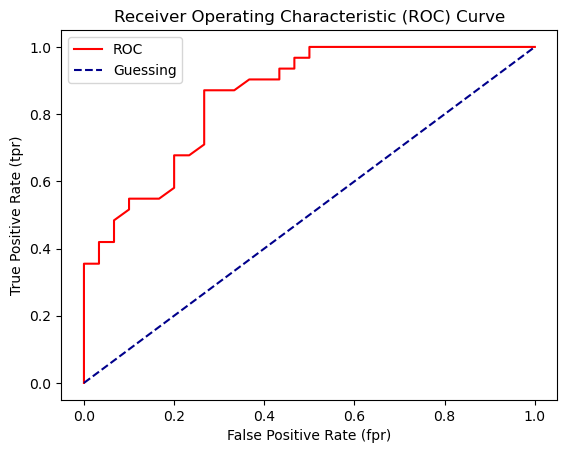

In [331]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    # Plot ROC Curve
    plt.plot(fpr,tpr,color="red",label="ROC")
    
    # Plot line with no predictive power (baseline)(To Compare our model to some other arbitrary model which jUst pREdiCts nothing.
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

    #Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [332]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.8548387096774193

#### Plot Perfect ROC Curve and AUC score (1.0)

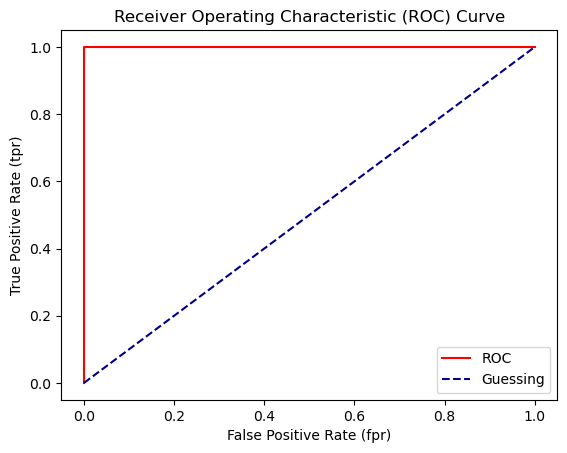

In [334]:
fpr,tpr,threshold=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [335]:
roc_auc_score(y_test,y_test)

1.0